## Gemini多模态处理能力

| 特性 | Gemini 1.5 Flash/Pro | Gemini 1.0 Pro Vision |
|------|----------------------|------------------------|
| 文本上下文长度 | 100万词元(约4000页) | 16,384词元(约128页) |
| 代码处理能力 | 可处理整个代码库 | 限16,384词元 |
| 单次处理图片数量 | 最多3000张 | 最多16张 |
| 音频处理 | 支持,最长8.4小时 | 不支持 |
| 视频处理 | 支持,最长50分钟(有音频)<br>1小时(无音频)<br>每次最多10个视频 | 支持,最长2分钟<br>每次1个视频<br>忽略音频 |
| PDF处理 | 最多300页,30MB | 最多16页,30MB |
| 输出限制 | 无特别说明 | 最多2,048词元 |


![](https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240923152248.png)

Gemini API 支持将媒体文件与提示输入分开上传，这样可以在多个请求和提示中重复使用媒体文件。

要使用文件API不是必需项，也可以使用本地文件直接响应请求

1. 本地路径直接上传:
   - 优点: 简单直接,但需要自己解析数据
   - 缺点: 每次使用都需重新上传,不可重复利用

2. 通过API上传到Google:  
   - 优点: 可在多个请求中重复使用,节省时间和带宽，免费，推荐
   - 缺点: 需要额外的上传步骤

总结:
直接上传适合一次性使用;
API上传适合需要多次使用同一文件的场景。
选择取决于使用频率和效率需求。

其文件 API 允许每个项目存储最多 20GB 的文件，每个文件的大小不超过 2GB。文件存储 48 小时，并且可以在此期间使用您的 API 密钥进行访问，服务为免费提供。

我们将要学习如何使用文件的API，主要包括以下方法：

- **upload_file**：上传文件，创建新的 `File` 资源。
- **files.get**：获取指定文件的元数据。
- **files.list**：列出当前项目中的所有文件。
- **files.delete**：删除指定的文件。

接下来，我们将逐一详细介绍每个方法的使用方法和注意事项。


In [2]:
import os
import google.generativeai as genai

genai.configure(api_key=os.environ["API_KEY"],transport="rest")
model = genai.GenerativeModel('models/gemini-1.5-flash-exp-0827')


因为要参数离不开要上传的文件路径，所以可以先看看当前路径

In [17]:
import os
print(os.getcwd())

D:\PycharmProject\Gemini-系列


打开要上传的图片

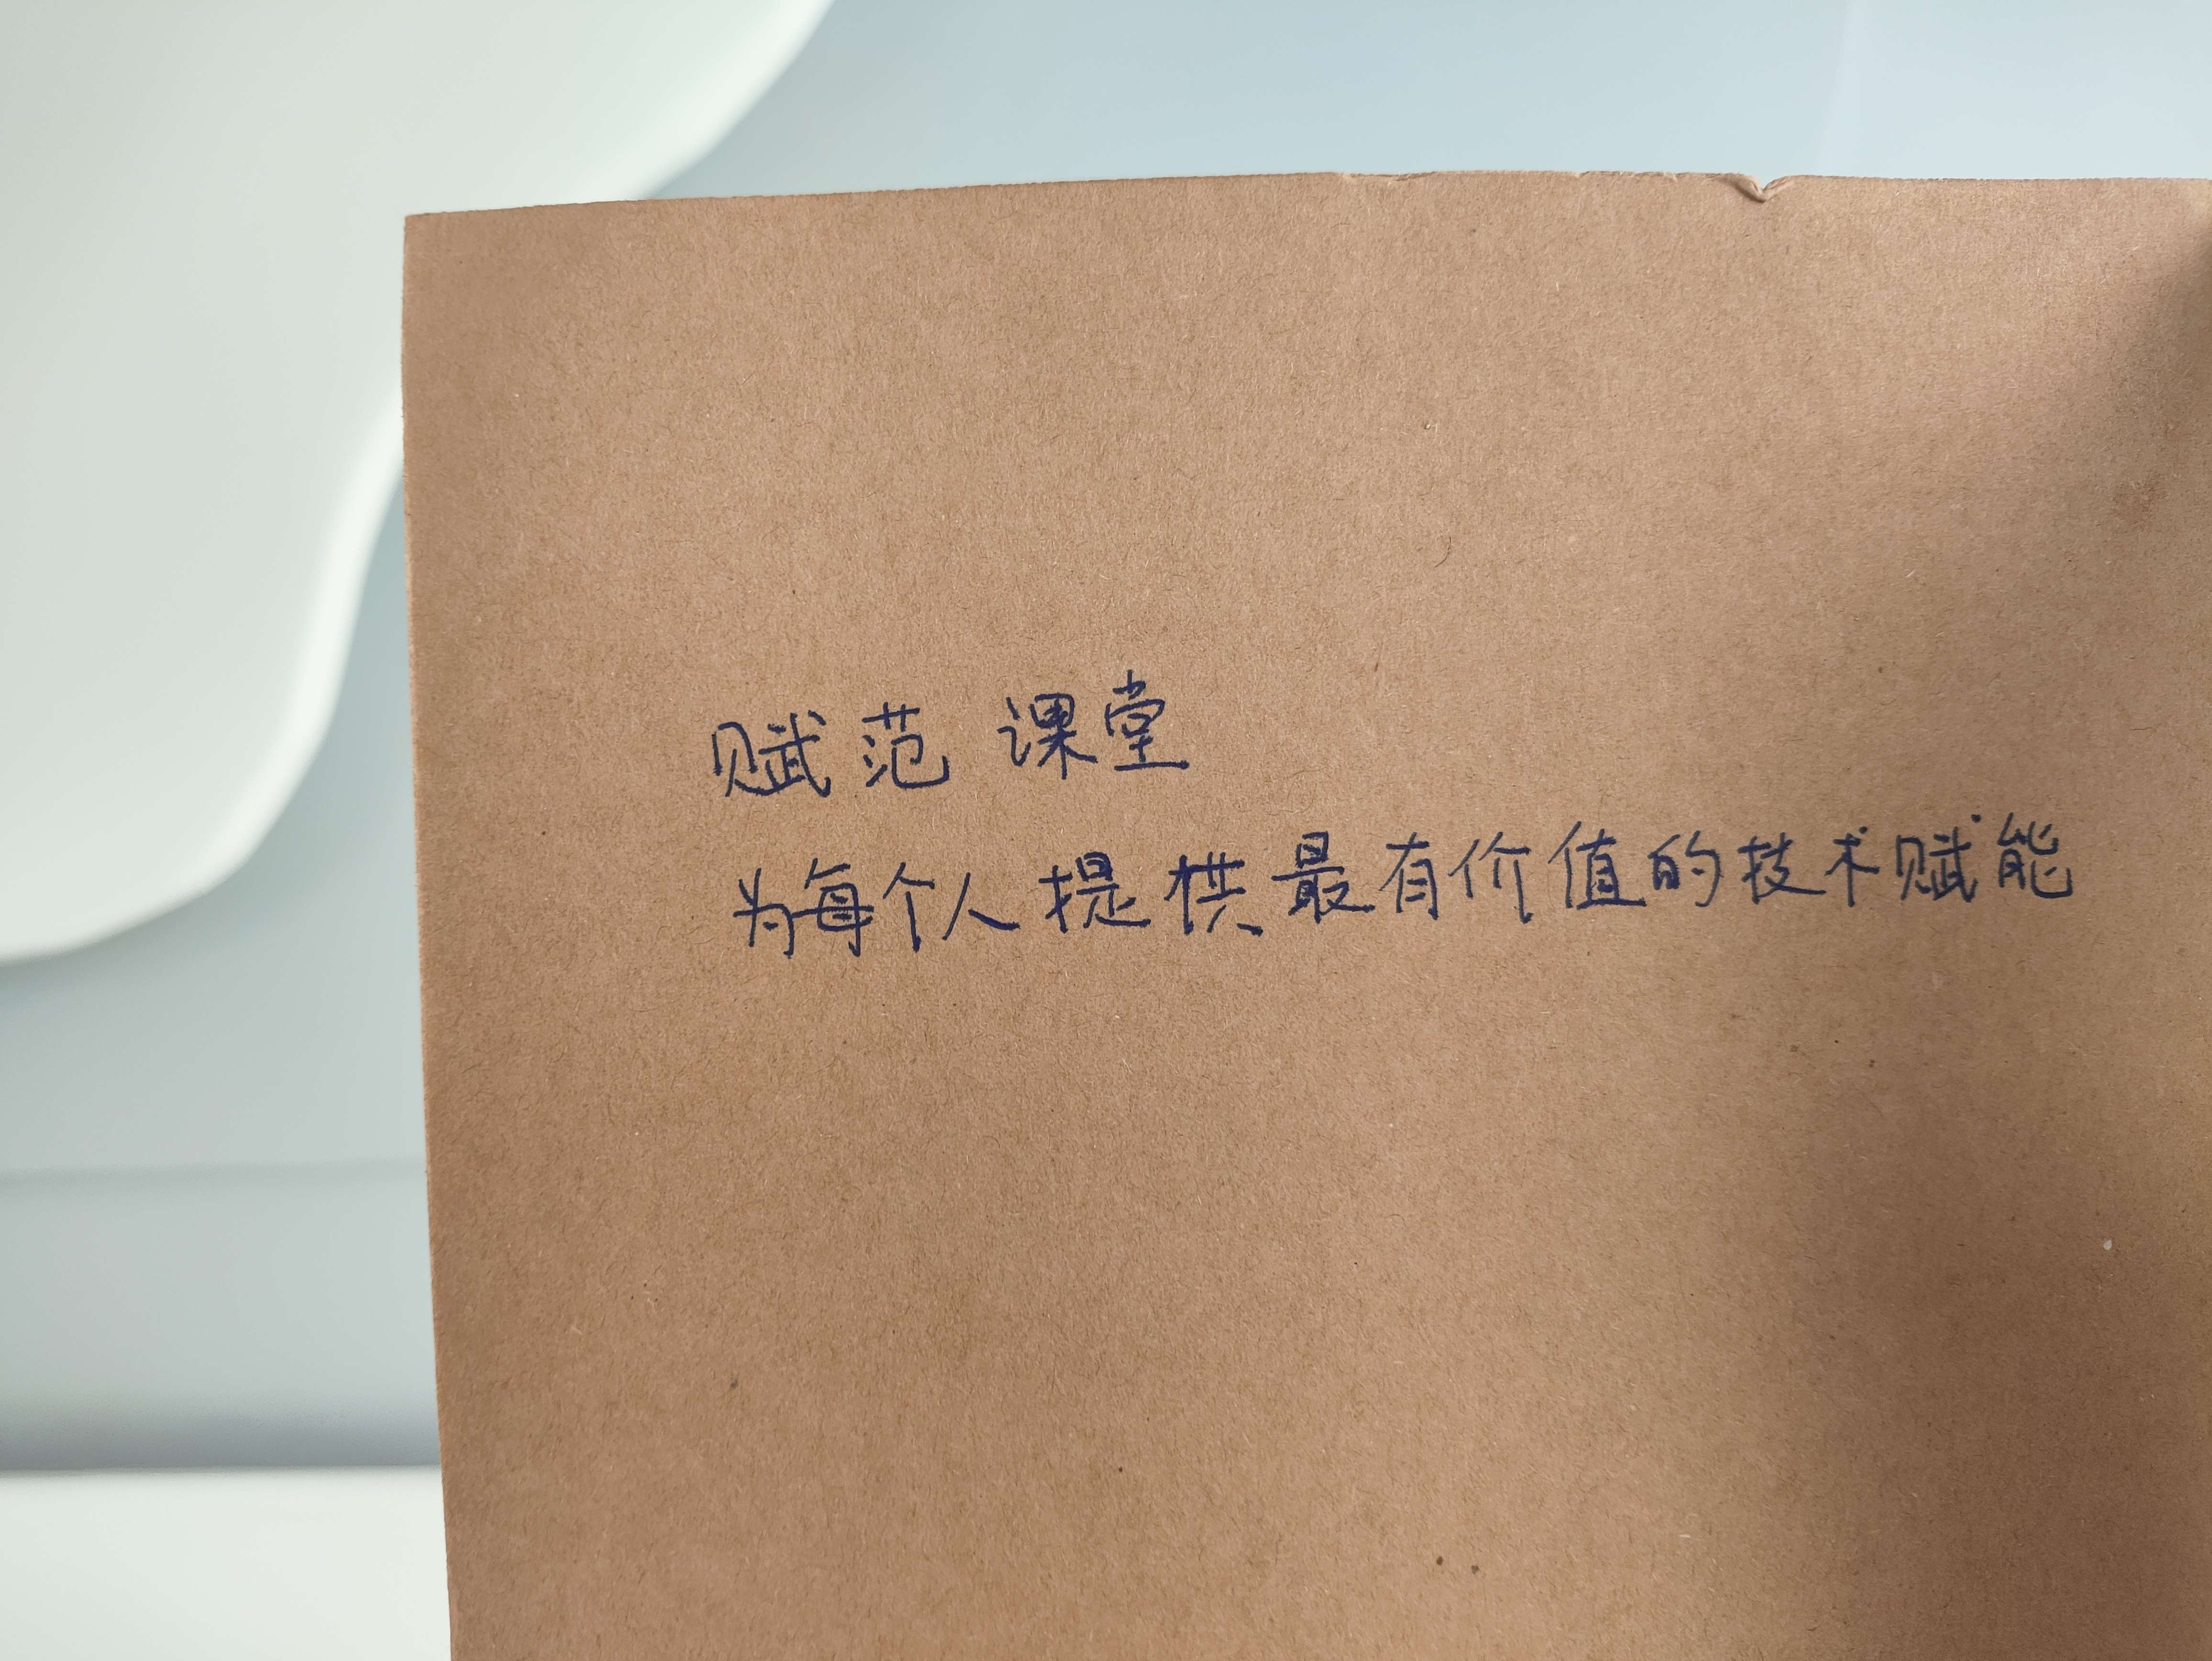

In [13]:
import PIL
from IPython.display import display, Image

display(Image('media/压缩_手写照片.jpg', width=300))

指定上传文件的各种属性，包括文件路径、类型、名称，以及默认可恢复上传

1. path: 要上传的文件的路径。

2. mime_type: 文件的MIME类型。如果不提供，系统会根据文件扩展名自动推断。

3. name: 文件在目标位置的名称（例如，'files/sample-image'）。如果不提供，系统会生成一个ID作为名称。

4. display_name: 文件的显示名称，这是可选的。

如果上传超时，网络失败。但文字请求的API是可以的，说明是节点的问题，可以更改节点，并看看打开aistudio.google.com可否能正常打开

In [11]:
# 传入的图片文件的路径

myfile = genai.upload_file(path="media/压缩_手写照片.jpg", display_name="示例图片")
print(f"上传的文件信息：{myfile}")


上传的文件信息：genai.File({
    'name': 'files/9k71herxnrsr',
    'display_name': '示例图片',
    'mime_type': 'image/jpeg',
    'sha256_hash': 'OTNhZjBlMTMxOTY3Y2Y2NTQ5MDA3YWE3MDkxYWI4OTlkYjQyYmFlMTY3MTYyMDAwZjlkMGExZGIxMmE3ODg1MQ==',
    'size_bytes': '933284',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/9k71herxnrsr',
    'create_time': '2024-09-27T03:56:00.543534Z',
    'expiration_time': '2024-09-29T03:56:00.524119290Z',
    'update_time': '2024-09-27T03:56:00.543534Z'})


其中必须参数是path路径，有两种常用表示文件路径的方法

使用 Python 的 `str` 和 `pathlib.Path` 来处理文件路径

In [ ]:
from pathlib import Path

# 使用 str
file_path = "/path/to/file.txt"
print(file_path)  # 输出路径

# 使用 pathlib.Path
path = Path(file_path)
print(path.exists())  # 检查文件是否存在



In [15]:
# 使用上传的文件进行内容生成
model = genai.GenerativeModel("gemini-1.5-pro-exp-0827")
result = model.generate_content([
    myfile,
    "\n\n",
    "你能描述一下这张照片吗?"
])
print(f"生成的文本内容：{result.text}")


生成的文本内容：这张照片展示了一张浅棕色的卡纸或硬纸板。卡纸看起来像是手工纸，质地粗糙。在卡纸上用深蓝色的墨水写着两行中文。

这两行中文是：

**赋予课堂
指每个人都具有价值和觉醒**

简单来说，这段文字的意思是赋予课堂意义，让每个人都意识到自己的价值和潜力。

照片拍摄的角度略微倾斜，卡纸的一部分占据了图片的右边，左边可以看到模糊的白色和浅蓝色背景，可能是墙壁或桌子。

总的来说，这张照片给人一种质朴而富有哲理的感觉。


2. 获取文件——方法：get_file

**端点**：

```
GET https://generativelanguage.googleapis.com/v1beta/{name=files/*}
```

**路径参数**：

- **name**：必需。文件的唯一名称，格式为 `files/{file_id}`。

**文件状态**：如果文件正在处理（`PROCESSING`），某些元数据可能尚不可用。


In [3]:
# 假设之前上传了一个文件并获得了其名称
myfile = genai.upload_file('media/fufan.txt')
file_name = myfile.name
print(f"文件名称：{file_name}")  # 输出类似于 "files/abc123"

myfile_info = genai.get_file(file_name)
print(f"文件元数据：{myfile_info}")


文件名称：files/wc3jmzwjek7c
文件元数据：genai.File({
    'name': 'files/wc3jmzwjek7c',
    'display_name': 'fufan.txt',
    'mime_type': 'text/plain',
    'sha256_hash': 'YjQ0YWE0YmNhNTI5NzgyZWYzODAzNzNlYjllZTM2N2M5NmE1YzEwYTJjYzc2OTc3NGE0YjI3NjBiOThiNGNmMA==',
    'size_bytes': '54',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/wc3jmzwjek7c',
    'create_time': '2024-09-27T03:47:39.848307Z',
    'expiration_time': '2024-09-29T03:47:39.831682628Z',
    'update_time': '2024-09-27T03:47:39.848307Z'})


注意get_file的入参是文件元数据的name，不是本地文件名，也不是display name（可跳转源代码查看）

In [7]:
# myfile_info = genai.get_file('media/fufan.txt')
# myfile_info = genai.get_file('fufan.txt')
# myfile_info = genai.get_file(myfile)


myfile_info = genai.get_file(myfile.name)
print(f"文件元数据：{myfile_info}")

文件元数据：genai.File({
    'name': 'files/wc3jmzwjek7c',
    'display_name': 'fufan.txt',
    'mime_type': 'text/plain',
    'sha256_hash': 'YjQ0YWE0YmNhNTI5NzgyZWYzODAzNzNlYjllZTM2N2M5NmE1YzEwYTJjYzc2OTc3NGE0YjI3NjBiOThiNGNmMA==',
    'size_bytes': '54',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/wc3jmzwjek7c',
    'create_time': '2024-09-27T03:47:39.848307Z',
    'expiration_time': '2024-09-29T03:47:39.831682628Z',
    'update_time': '2024-09-27T03:47:39.848307Z'})


3. 列出文件——方法：list_files

**端点**：

```
GET https://generativelanguage.googleapis.com/v1beta/files
```


- **设置分页**：可使用 `page_size` 参数控制每页的文件数量。
- **遍历文件**：`list_files` 方法返回一个可迭代的对象，包含所有文件的 `File` 对象。

### 注意事项

- **分页处理**：如果文件数量较多，需处理分页逻辑，使用 `next_page_token` 获取下一页数据。
- **性能考虑**：合理设置 `page_size`，避免一次性请求过多数据。


In [23]:
print("我的文件列表：")
for f in genai.list_files():
    print("  ", f.name,"  ", f.display_name,"  ", f.mime_type,"  ", f.size_bytes)


我的文件列表：
   files/qgwnxqeavtd2    压缩_手写照片.jpg    image/jpeg    933284
   files/9k71herxnrsr    示例图片    image/jpeg    933284
   files/wc3jmzwjek7c    fufan.txt    text/plain    54


4. 删除文件——方法：delete

**端点**：

```
DELETE https://generativelanguage.googleapis.com/v1beta/{name=files/*}
```

**路径参数**：

- **name**：必需。要删除的文件的名称，格式为 `files/{file_id}`。


**删除文件**：使用 `delete_file` 方法，传入文件名称。
- **错误处理**：删除后尝试使用该文件，将引发异常，需进行错误处理。

### 注意事项

- **使用检查**：在删除前，确认该文件未在其他地方被使用。
- **不可恢复**：删除操作是不可逆的，删除后无法恢复文件。


In [24]:

file_name="files/qgwnxqeavtd2"
# 删除文件
genai.delete_file(file_name)


# 尝试使用已删除的文件将会引发错误
try:
    myfile_info = genai.get_file(file_name)
except Exception as e:
    print("错误：无法获得已删除的文件。")


错误：无法使用已删除的文件。


In [40]:
print("我的文件列表：")
for f in genai.list_files():
    print("  ", f.name,"  ", f.display_name,"  ", f.mime_type,"  ", f.size_bytes)

我的文件列表：
   files/shotvedio    shot_vedio.mp4    video/mp4    1262213
   files/shot-vedio    shot_vedio.mp4    video/mp4    1262213
   files/golden-hour    golden_hour.mp3    audio/mpeg    3349151
   files/mysu1p498zls    golden_hour.mp3    audio/mpeg    3349151
   files/9k71herxnrsr    示例图片    image/jpeg    933284
   files/wc3jmzwjek7c    fufan.txt    text/plain    54


 文件资源重要字段解释

- **name**：文件的唯一标识符，格式为 `files/{file_id}`。
- **displayName**：文件的显示名称，便于识别。
- **mimeType**：文件的 MIME 类型，例如 `image/jpeg`。
- **sizeBytes**：文件大小，单位为字节。
- **createTime**：文件的创建时间戳。
- **updateTime**：文件的最后更新时间戳。
- **expirationTime**：文件的过期时间戳（如果适用）。
- **sha256Hash**：文件内容的 SHA-256 哈希值，用于验证完整性。
- **uri**：文件的 URI，可用于直接访问文件。
- **state**：文件的处理状态。

文件状态详解

- **PROCESSING**：文件正在处理，尚不可用。
- **ACTIVE**：文件已处理完成，可以使用。
- **FAILED**：文件处理失败，需检查 `error` 字段获取错误信息。

In [37]:
import time
video_file = genai.upload_file("media/shot_vedio.mp4",name="shotvedio")
# 文件状态的应用：视频等大文件上传后，状态为 PROCESSING，需等其变为 ACTIVE 才可用于推理。
while video_file.state.name == "PROCESSING":
  print('.', end='')
  time.sleep(0.1)
  video_file = genai.get_file(video_file.name)

if video_file.state.name == "FAILED":
  raise ValueError(video_file.state.name)


...

1. **如何处理文件上传失败的问题？**

- **检查文件格式和大小**：确保文件类型受支持，且大小不超过限制。
- **查看错误信息**：如果上传失败，`File` 对象的 `error` 字段将包含详细的错误信息。

 2. **文件的有效期是多久？**

- **默认有效期**：文件的默认的过期时间为2天
- **查看 `expirationTime`**：通过文件的 `expirationTime` 字段，查看文件的过期时间。

 3. **是否可以更新已上传文件的内容？**

- **不支持直接更新**：一旦文件上传，无法修改其内容。
- **解决方案**：如果需要更新文件，建议删除旧文件，重新上传新的文件。

count tokens

![](https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240927152442.png)

当启用计费时，付费请求的价格由输入和输出令牌的数量控制，因此了解如何计算令牌非常重要，特别是当输入内容是不直观的音频，视频，多模态的时候。



先从文字的开始说起

In [14]:
model = genai.GenerativeModel("models/gemini-1.5-flash")

prompt = "这只伶俐的棕色狐狸跳过一只懒惰的狗"

# 调用 `count_tokens` 获取输入的 token 数量 (`total_tokens`)。
print("总 token 数: ", model.count_tokens(prompt))
# ( 总 token 数: 13 )

response = model.generate_content(prompt)




总 token 数:  total_tokens: 13

prompt_token_count: 14
candidates_token_count: 97
total_token_count: 111



In [15]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "\u8fd9\u662f\u4e00\u4e2a\u751f\u52a8\u7684\u56fe\u50cf\uff01\u6211\u559c\u6b22\u4f60\u5bf9\u72d0\u72f8\u7684\u63cf\u8ff0\u3002\u4f60\u662f\u5426\u60f3\u8ba9\u6211\u8fdb\u4e00\u6b65\u63cf\u8ff0\u573a\u666f\uff0c\u6216\u8005\u4f60\u60f3\u8981\u6211\u7528\u5176\u4ed6\u65b9\u5f0f\u6765\u6269\u5c55\u8fd9\u4e2a\u53e5\u5b50\uff1f\n\n\u4f8b\u5982\uff0c\u6211\u53ef\u4ee5\uff1a\n\n* \u63cf\u8ff0\u72d0\u72f8\u548c\u72d7\u7684\u5177\u4f53\u7279\u5f81\u3002\n* \u8865\u5145\u5173\u4e8e\u5b83\u4eec\u5468\u56f4\u7684\u73af\u5883\u7684\u4fe1\u606f\u3002\n* \u52a0\u5165\u4e00\u4e2a\u52a8\u4f5c\u6765\u89e3\u91ca\u72d0\u72f8\u4e3a\u4ec0\u4e48\u8df3\u8fc7\u72d7\u3002\n* \u6539\u53d8\u53e5\u5b50\u7684\u98ce\u683c\uff0c\u4f8b\u5982\u4f7f\u7528\u66f4\u751f\u52a8\u7684\u8bed\u8a00\u

In [16]:
# 在 `generate_content` 的响应中，使用 `usage_metadata`
# 获取输入和输出的 token 数量
# (`prompt_token_count` 和 `candidates_token_count`)，
# 以及总的 token 数量 (`total_token_count`)。
print(response.usage_metadata)
# ( 输入 token 数: 14, 输出 token 数: 97, 总 token 数: 111 )

prompt_token_count: 14
candidates_token_count: 97
total_token_count: 111



多模态的图片token：
既可以直接问答，也可以用谷歌文件API先上传到谷歌云盘中

In [20]:
pic = PIL.Image.open('media/压缩_手写照片.jpg')
model.count_tokens(['Tell me about this picture', pic])

total_tokens: 447

In [22]:
pic_upload = genai.upload_file('media/压缩_手写照片.jpg')

model.count_tokens(['Tell me about this instrument', pic_upload])

total_tokens: 447

In [21]:
response = model.generate_content(['Tell me about this picture', pic])
print(response.usage_metadata)

prompt_token_count: 448
candidates_token_count: 32
total_token_count: 480



音频和视频分别以每分钟固定的速率转换为标记。

In [31]:
audio_sample = genai.upload_file('media/golden_hour.mp3',name="golden-hour")
model.count_tokens(audio_sample)

total_tokens: 6904

In [ ]:
video_file = genai.upload_file("media/shot_vedio.mp4",name="shortvedio")#一个3秒的视频

In [38]:
model.count_tokens(video_file)

total_tokens: 1069

In [39]:
response=model.generate_content([ video_file,'描述这个视频，并起一个抓人眼球吸引人的标题'])
print(response.text)

这是一个关于一朵粉色花朵的视频。
标题：花开绽放，美丽动人。 



系统指令和工具也计入总数：

In [17]:
genai.GenerativeModel().count_tokens("这只伶俐的棕色狐狸跳过一只懒惰的狗")

total_tokens: 13

In [18]:
genai.GenerativeModel(system_instruction='Talk like a pirate!').count_tokens("这只伶俐的棕色狐狸跳过一只懒惰的狗")

total_tokens: 18

In [19]:
def add(a:float, b:float):
    """returns a + b."""
    return a+b

def subtract(a:float, b:float):
    """returns a - b."""
    return a-b

def multiply(a:float, b:float):
    """returns a * b."""
    return a*b

def divide(a:float, b:float):
    """returns a / b."""
    return a*b

model = genai.GenerativeModel(model_name='gemini-1.5-flash',
                              tools=[add, subtract, multiply, divide])
model.count_tokens("这只伶俐的棕色狐狸跳过一只懒惰的狗")

total_tokens: 197